In [27]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [28]:
import os
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
# Import required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load dataset

#import and read final csv file
data = pd.read_csv('Modeled_Database.csv')
data.head()

,Ticker,Company Name,HQ City,HQ State/Province,HQ Country,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,Social Risk Score,...,2019 Performance,Market Cap,Exchange,CEO,Logo Image URL,Website URL,Industry,Sector,Company Description,Grouping
0,MMM,3M Company,Saint paul,Minnesota,United states of america,35,High,69th percentile,12.6,12.7,...,-7.410517,9.350000e+10,New York Stock Exchange,Inge G. Thulin,https://financialmodelingprep.com/images-New-j...,http://www.3m.com,Industrial Products,Industrials,3M Co is a diversified technology company. It ...,6
1,AOS,A.O. Smith Corporation,Milwaukee,Wisconsin,United states of america,25,Medium,37th percentile,13.6,4.3,...,11.569087,7.090000e+09,New York Stock Exchange,NaN,https://financialmodelingprep.com/images-New-j...,http://www.aosmith.com,Industrial Products,Industrials,A.O. Smith Corp manufactures and markets water...,2
2,ABT,Abbott Laboratories,Abbott park,Illinois,United states of america,31,High,57th percentile,3.7,15.3,...,20.088483,1.580000e+11,New York Stock Exchange,Miles D. White,https://financialmodelingprep.com/images-New-j...,http://www.abbott.com,Drug Manufacturers,Healthcare,Abbott Laboratories is a health care company t...,5
3,ABBV,AbbVie Inc.,North chicago,Illinois,United states of america,30,High,56th percentile,1.0,16.5,...,-3.959215,1.210000e+11,New York Stock Exchange,Richard A. Gonzalez,https://financialmodelingprep.com/images-New-j...,http://www.abbvie.com,Drug Manufacturers,Healthcare,AbbVie Inc is a biopharmaceutical company that...,5
4,ABN.AS,ABN AMRO Bank N.V.,Amsterdam,Noord-holland,Netherlands,86,Severe,98th percentile,90.0,85.0,...,-21.032132,1.490000e+10,Amsterdam,NaN,https://financialmodelingprep.com/images-New-j...,http://www.abnamro.com,Banks—Diversified,Financial Services,ABN AMRO Bank N.V. provides various banking pr...,1


In [30]:
#create dataframe of required columns

ESG_df = data[['Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']].copy()
ESG_df

,Environment Risk Score,Social Risk Score,Governance Risk Score
0,12.6,12.7,9.2
1,13.6,4.3,7.3
2,3.7,15.3,11.6
3,1.0,16.5,12.8
4,90.0,85.0,84.0
...,...,...,...
718,4.1,10.9,5.3
719,8.8,12.5,8.3
720,3.3,15.8,11.1
721,3.8,18.5,11.5


In [31]:
# shape
print(ESG_df.shape)

(723, 3)


In [32]:
#Use minmax scaler to normalize data
#Compare Algorithms
mms = MinMaxScaler()
mms.fit(ESG_df)
ESG_df_transformed = mms.transform(ESG_df)

In [33]:
# descriptions
print(ESG_df.describe())

       Environment Risk Score  Social Risk Score  Governance Risk Score
count              723.000000         723.000000             723.000000
mean                 6.790318          10.826833               8.422545
std                  8.584418           7.022043               6.932644
min                  0.000000           1.000000               3.300000
25%                  1.600000           7.400000               6.000000
50%                  4.000000          10.000000               7.100000
75%                  9.550000          12.900000               9.000000
max                 90.000000          88.000000              90.000000


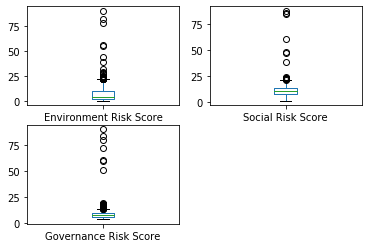

<Figure size 640x480 with 0 Axes>

In [34]:
from matplotlib.pyplot import figure

#Data Visualization to check distribution of data 
# box and whisker plots
ESG_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
figure(num=None, figsize=(8, 6), dpi=80)
pyplot.show()

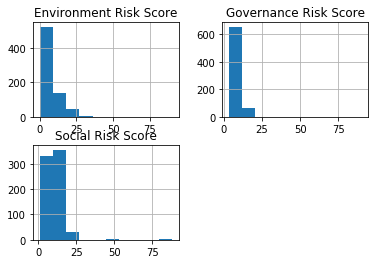

<Figure size 640x480 with 0 Axes>

In [11]:
#more visiulization of data
# histograms
ESG_df.hist()
figure(num=None, figsize=(8, 6), dpi=80)
pyplot.show()

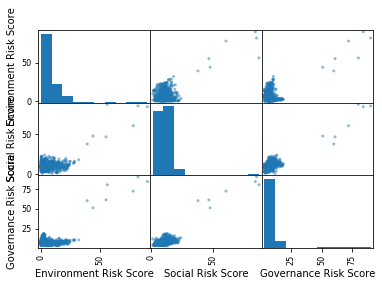

In [13]:
#check interaction between veriables
# scatter plot matrix
scatter_matrix(ESG_df)

pyplot.show()

In [35]:
#Use minmax scaler to normalize data
#Compare Algorithms
mms = MinMaxScaler()
mms.fit(ESG_df)
ESG_df_transformed = mms.transform(ESG_df)

In [49]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ESG_df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

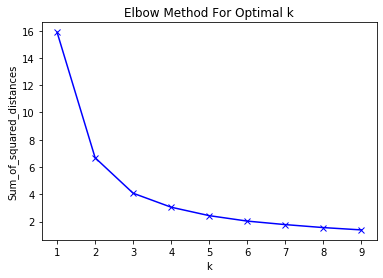

In [50]:
# ploting figure to show number of optimised cluster using Elbow method

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ESG_df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

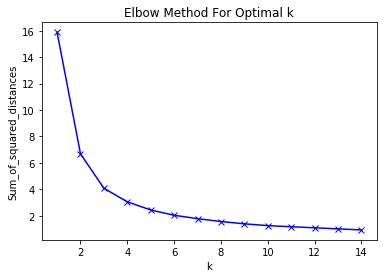

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ESG_df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

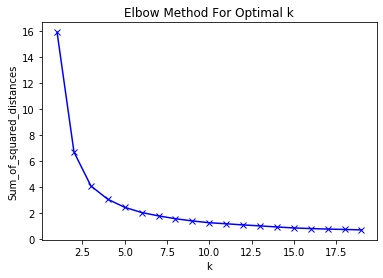

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

 Based on the Above plot, decided to take 8-clusters in the k-means.